# Macroeconomic Dimension

In [ ]:
# Import Data
folder_path = "01- Data_macro"
df_macro = pd.read_excel(os.path.join(folder_path, "macro.xlsx"))

In [177]:
selected_countries = [
    "Algeria"	, "Angola"	, "Bahrain"	, "Botswana"	, "Burkina Faso"	, "Cameroon"	, 
    "Chad"	, "Congo, Dem. Rep."	, "Djibouti"	, "Egypt, Arab Rep."	, "Ethiopia"	, 
    "France"	, "Gabon"	, "Gambia, The"	, "Ghana"	, "Guinea"	, "Guinea-Bissau"	, 
    "Zimbabwe"	, "Jordan"	, "Kenya"	, "Madagascar"	, "Malawi"	, "Maldives"	, 
    "Mauritania"	, "Mozambique"	, "Namibia	"	, "Nepal"	, "Nigeria"	, "Oman"	, 
    "Pakistan"	, "Qatar	"	, "Congo, Rep.	"	, "Romania"	, "Senegal"	, "Seychelles"	, 
    "South Sudan"	, "Sri Lanka"	, "Sudan"	, "Tunisia"	, "Uganda"	, "Viet Nam"	, 
    "Yemen, Rep."	, "Zambia",
    "United Arab Emirates" , "Cote d'Ivoire" , "Cyprus" , "Czechia" , 
    "Dominican Republic"  , "Iraq" , "Kuwait" , "Lebanon" , 
    "Libya" , "Morocco" , "Mauritius" , "Saudi Arabia" ,  
    "Serbia" , "Syrian Arab Republic" , "Tanzania" , "Turkiye"
]

group_dict = {
    "Afrique Australe": ["Angola","Botswana","Malawi","Mozambique","Namibia","Zambia","Zimbabwe", "Mauritius"],
    "Afrique Centrale": ["Cameroon","Congo Dem Rep","Congo Rep","Gabon", "Chad"],
    "Afrique de l'Ouest": ["Burkina Faso","Gambia The","Ghana","Guinea","Guinea-Bissau", "Nigeria", "Senegal", "Cote d'Ivoire"],
    "Afrique du Nord": ["Algeria","Egypt Arab Rep","Mauritania","South Sudan","Sudan","Tunisia", "Libya", "Morocco"],
    "Asie": ["Maldives","Nepal","Pakistan","Sri Lanka","Viet Nam"],
    "Corne de l'Afrique": ["Djibouti","Ethiopia","Madagascar","Seychelles", "Kenya", "Uganda", "Tanzania"],
    "Europe": ["France","Romania","Turkiye", "Cyprus", "Czechia", "Serbia", "Dominican Republic"],
    "Moyen-Orient": ["Bahrain","Jordan","Oman","Qatar","Yemen, Rep.", "United Arab Emirates", "Iraq", "Kuwait", "Lebanon", "Saudi Arabia", "Syrian Arab Republic"],
}

In [ ]:
# Clean the 'Country' column (to remove unwanted spaces or tabs)
df_macro["Country"] = df_macro["Country"].str.strip()

# Filter the selected countries
df_macro = df_macro[df_macro["Country"].isin(selected_countries)]

# Create a mapping from country → group
country_to_group = {country: group for group, countries in group_dict.items() for country in countries}

# Add the "Group" column
df_macro["Group"] = df_macro["Country"].map(country_to_group)

# Move the "Group" column to the beginning
cols = ["Group"] + [col for col in df_macro.columns if col != "Group"]
df_macro = df_macro[cols]

# Handle missing values
df_macro = impute_values(df_macro)


In [180]:
df_macro["Indicateur"].unique()

array(['GDP', 'Inflation', 'Chomage'], dtype=object)

## Visualization Indicators

✅ Figure saved successfully to: 05-Results/03-macro_dim/tunisia_gdp.png


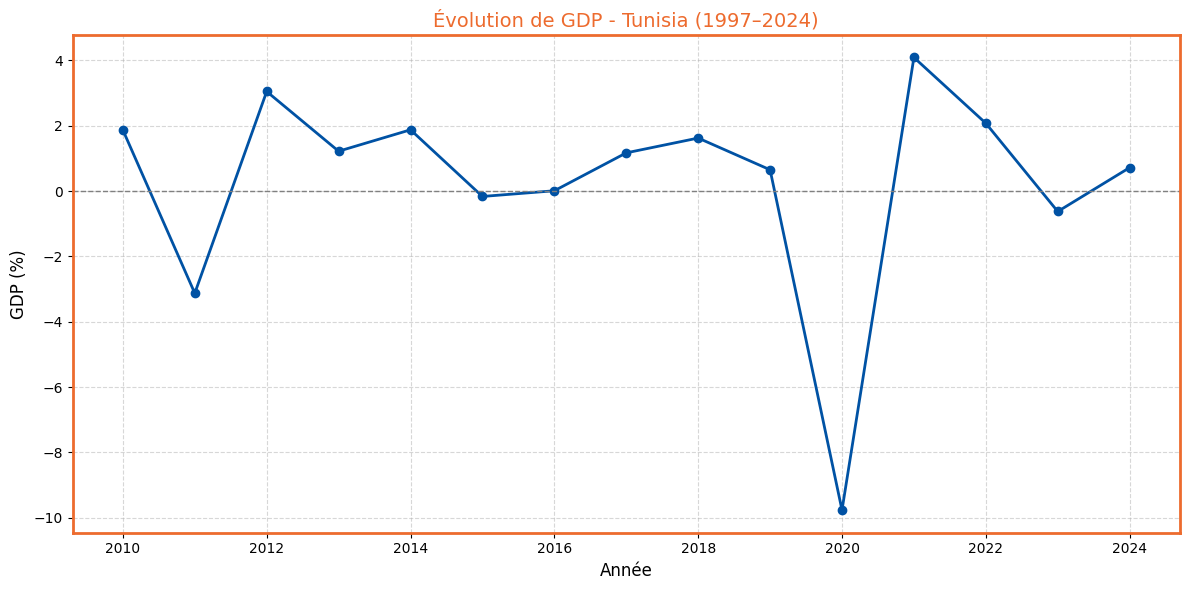

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Évolution de GDP - Tunisia (1997–2024)'}, xlabel='Année', ylabel='GDP (%)'>)

In [ ]:
plot_macro_indicator(
    df_macro=df_macro,
    country_name="Tunisia",
    indicator="GDP",
    save_path="03- Output/tunisia_gdp.png"
)

✅ Figure saved successfully to: 05-Results/03-macro_dim/tunisia_infl.png


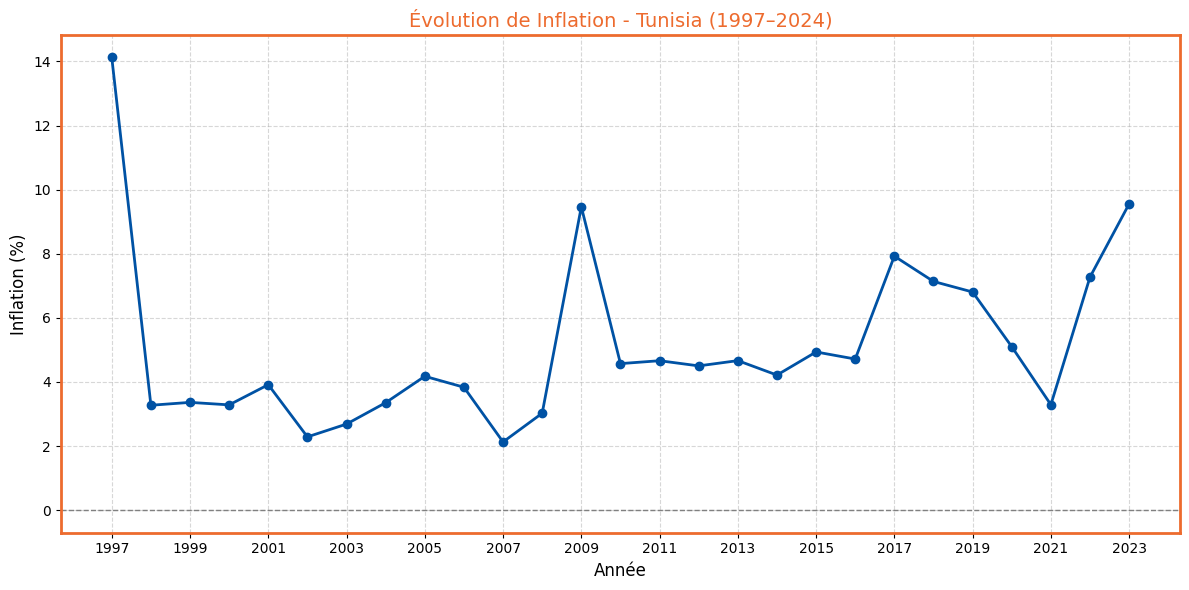

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Évolution de Inflation - Tunisia (1997–2024)'}, xlabel='Année', ylabel='Inflation (%)'>)

In [ ]:
plot_macro_indicator(
    df_macro=df_macro,
    country_name="Tunisia",
    indicator="Inflation",
    save_path="003- Output/tunisia_infl.png"
)

✅ Figure saved successfully to: 05-Results/03-macro_dim/tunisia_chom.png


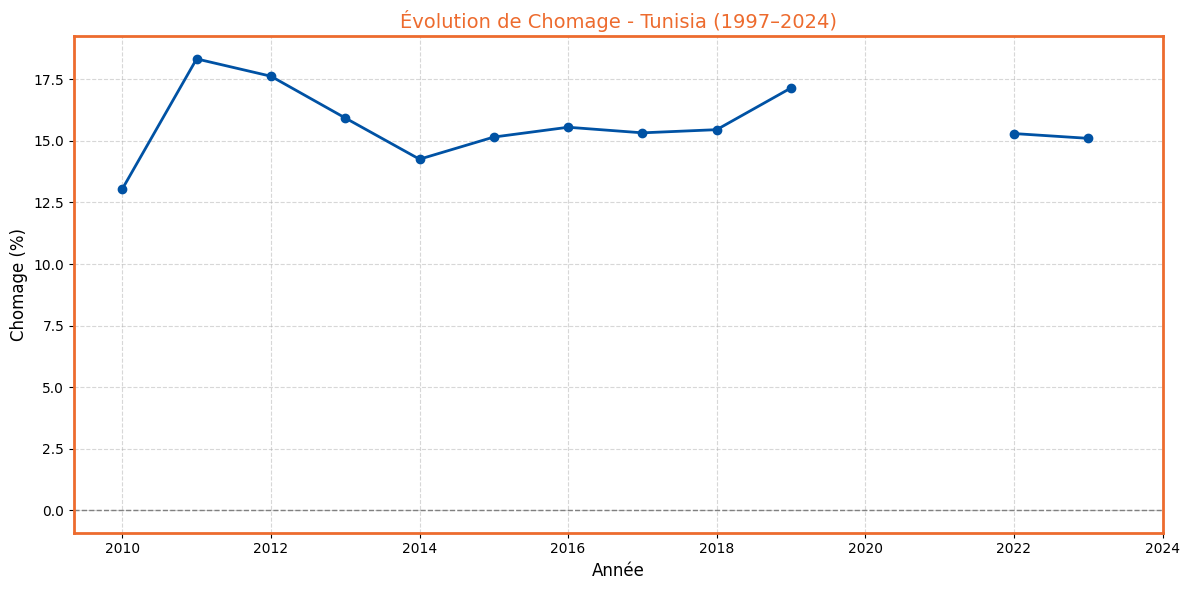

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Évolution de Chomage - Tunisia (1997–2024)'}, xlabel='Année', ylabel='Chomage (%)'>)

In [ ]:
plot_macro_indicator(
    df_macro=df_macro,
    country_name="Tunisia",
    indicator="Chomage",
    save_path="003- Output/tunisia_chom.png"
)

## Score Macro

### Global

In [ ]:
# Global Score
if __name__ == "__main__":
    data_demo = df_macro[["Groupe",	"Pays",	"Indicateur", 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]].copy()
    
    df_pays, df_groupes = compute_macro_risk_pipeline(data_demo, export_excel="03- Output/risque_macro.xlsx")

    #print("\n--- Score by Countries ---\n", df_pays.head())
    #print("\n--- Score by GROUPE ---\n", df_groupes.head())

✅ Résultats exportés vers : 05-Results/03-macro_dim/risque_macro.xlsx


### Per Year

In [ ]:
# score by year 
PERIOD = list(range(2015, 2025))
MIN_YEARS_REQUIRED = 4
if __name__ == "__main__":
    data_demo = df_macro[["Groupe",	"Pays",	"Indicateur", 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]].copy()
    
    df_pays_year, df_groupes_year = compute_macro_risk_pipeline_per_year(data_demo, export_excel="03- Output/risque_macro_per_year.xlsx")

    #print("\n--- Scores by countries ---\n", df_pays.head())
    #print("\n--- Scores by GROUPE ---\n", df_groupes.head())

✅ Résultats exportés vers : 05-Results/03-macro_dim/risque_macro_per_year.xlsx


### Factors Maps

In [182]:
groupes = [
    "Afrique Australe", "Afrique Centrale", "Afrique de l'Ouest",
    "Afrique du Nord", "Asie", "Corne de l'Afrique",
    "Europe", "Moyen-Orient"
]

✅ Figure sauvegardée : 05-Results/03-macro_dim/factors_maps\risk_matrix_Afrique Australe.png


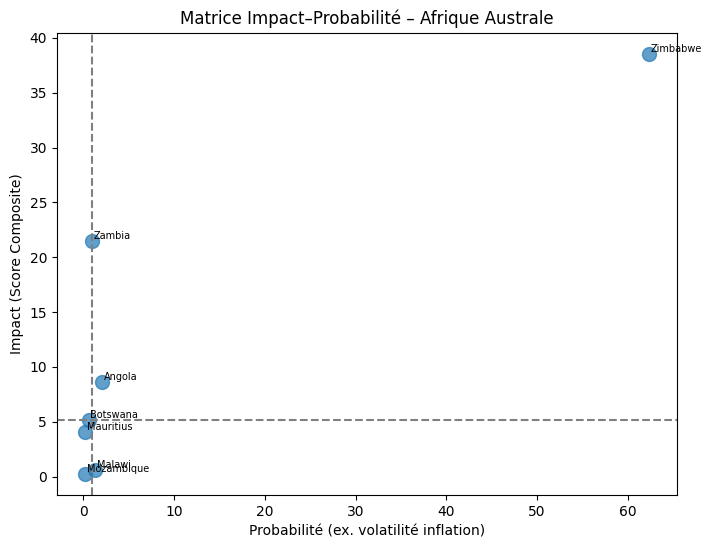

✅ Figure sauvegardée : 05-Results/03-macro_dim/factors_maps\risk_matrix_Afrique Centrale.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/factors_maps\risk_matrix_Afrique de l'Ouest.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/factors_maps\risk_matrix_Afrique du Nord.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/factors_maps\risk_matrix_Asie.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/factors_maps\risk_matrix_Corne de l'Afrique.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/factors_maps\risk_matrix_Europe.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/factors_maps\risk_matrix_Moyen-Orient.png


In [ ]:

plot_risk_matrices(
    df_pays=df_pays,
    groupes=groupes,
    save_path="03- Output/factors_maps",
    max_show=1
)

### Matrices Risk

✅ Figure sauvegardée : 05-Results/03-macro_dim/risk_matrices_classes\risk_matrix_class_Afrique Australe.png


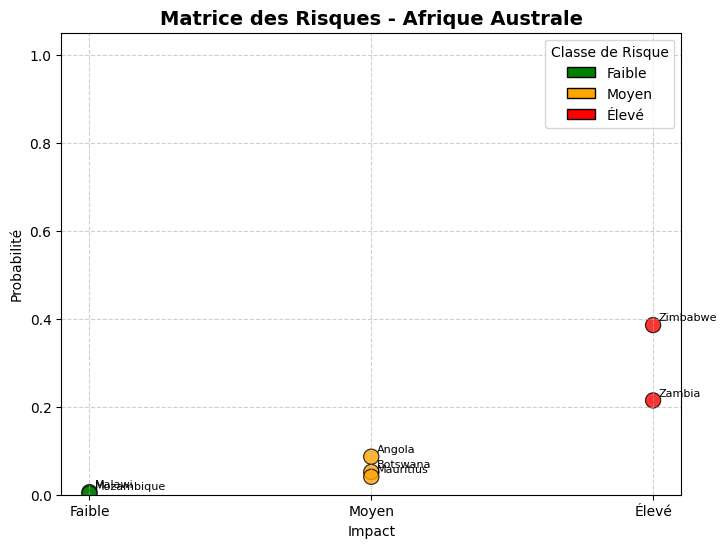

✅ Figure sauvegardée : 05-Results/03-macro_dim/risk_matrices_classes\risk_matrix_class_Afrique Centrale.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/risk_matrices_classes\risk_matrix_class_Afrique de l'Ouest.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/risk_matrices_classes\risk_matrix_class_Afrique du Nord.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/risk_matrices_classes\risk_matrix_class_Asie.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/risk_matrices_classes\risk_matrix_class_Corne de l'Afrique.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/risk_matrices_classes\risk_matrix_class_Europe.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/risk_matrices_classes\risk_matrix_class_Moyen-Orient.png


In [ ]:
plot_risk_matrices_classes(
    df=df_pays,
    groupes=groupes,
    save_path="03- Output/risk_matrices_classes",
    max_show=1
)

✅ Figure sauvegardée : 05-Results/03-macro_dim/risk_matrices_classes/group_risk_matrix.png


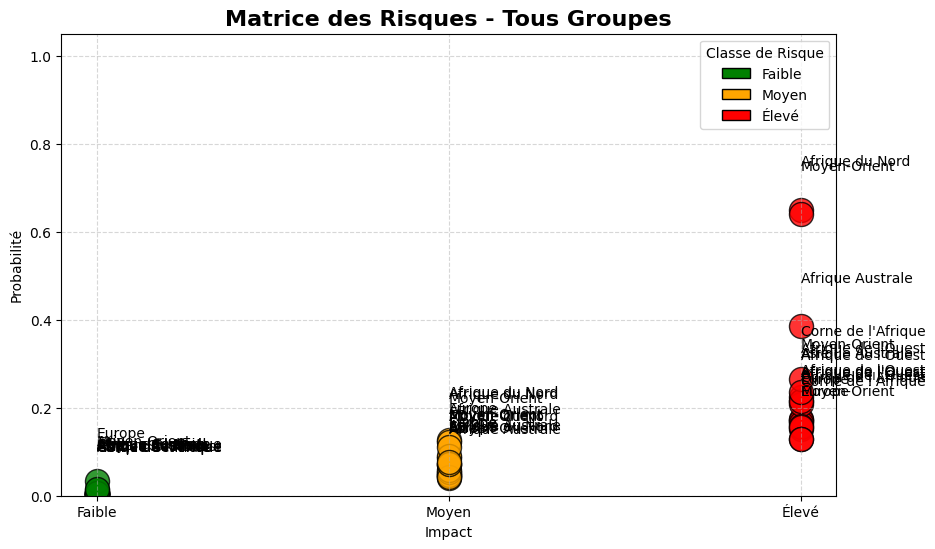

In [ ]:
plot_group_risk_matrix(
    df=df_pays,
    save_path="03- Output/risk_matrices_classes/group_risk_matrix.png",
    title="Matrice des Risques - Tous Groupes",
    show_fig=True
)

### Matrices Risk per Year

✅ Figure sauvegardée : 05-Results/03-macro_dim/pays\risk_matrix_Afrique Australe_2020.png


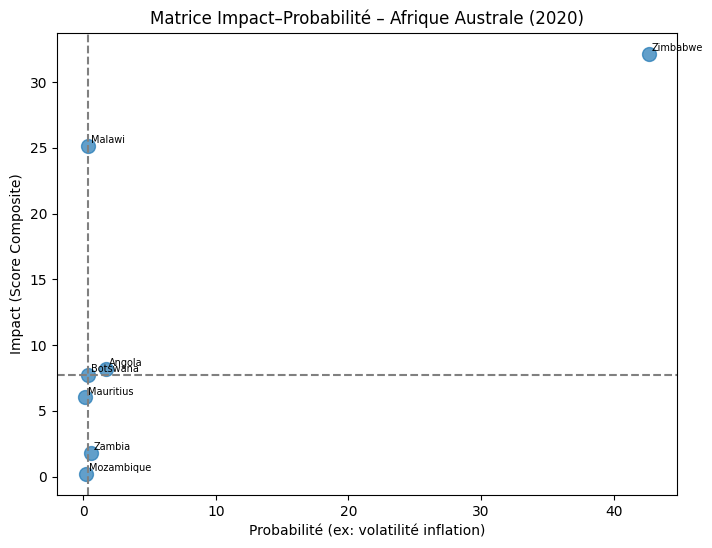

✅ Figure sauvegardée : 05-Results/03-macro_dim/pays\risk_matrix_Afrique Centrale_2020.png


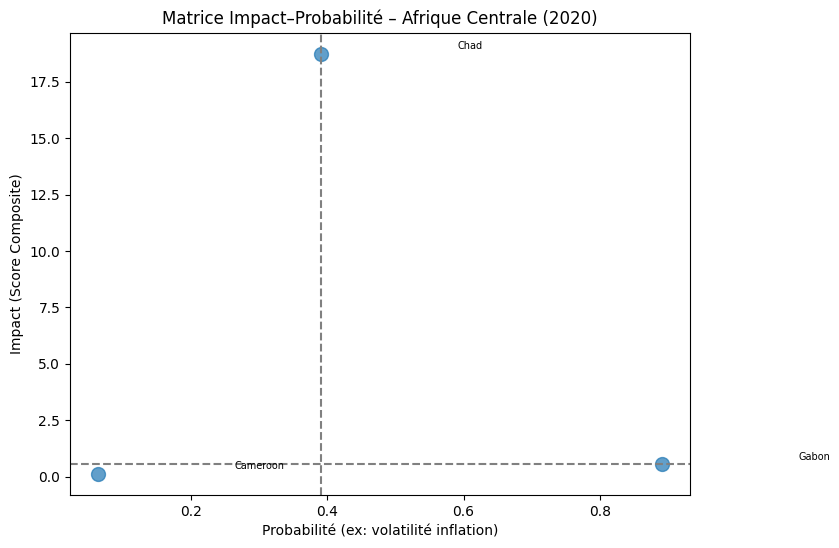

✅ Figure sauvegardée : 05-Results/03-macro_dim/pays\risk_matrix_Afrique de l'Ouest_2020.png


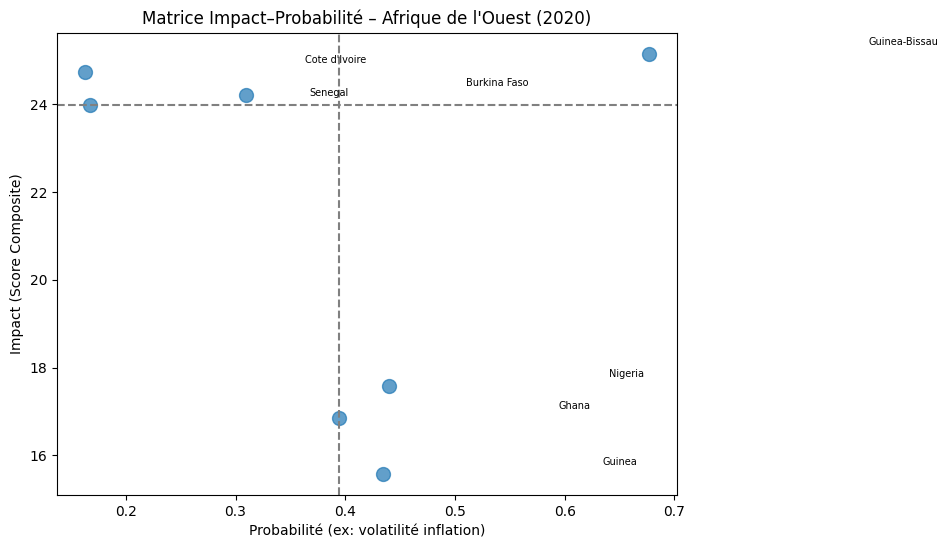

✅ Figure sauvegardée : 05-Results/03-macro_dim/pays\risk_matrix_Afrique du Nord_2020.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/pays\risk_matrix_Asie_2020.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/pays\risk_matrix_Corne de l'Afrique_2020.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/pays\risk_matrix_Europe_2020.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/pays\risk_matrix_Moyen-Orient_2020.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/pays\risk_matrix_Afrique Australe_2022.png


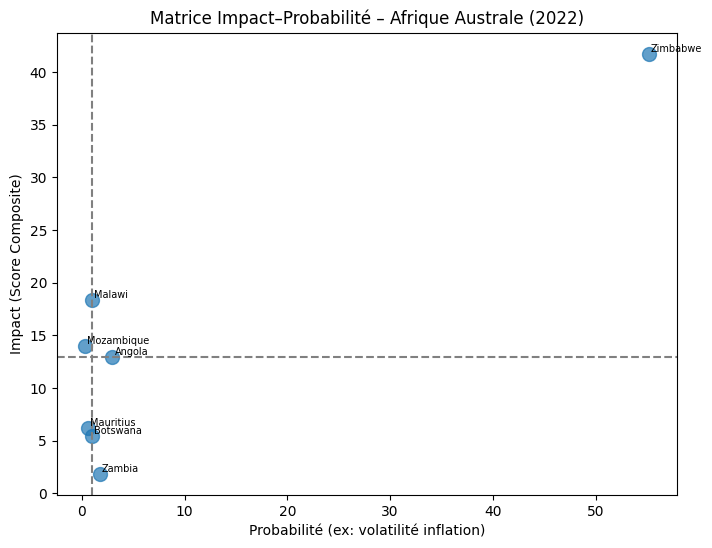

✅ Figure sauvegardée : 05-Results/03-macro_dim/pays\risk_matrix_Afrique Centrale_2022.png


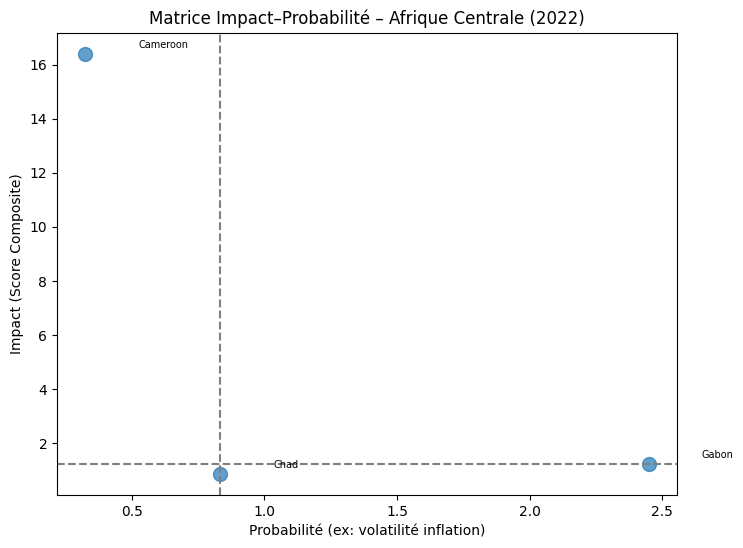

✅ Figure sauvegardée : 05-Results/03-macro_dim/pays\risk_matrix_Afrique de l'Ouest_2022.png


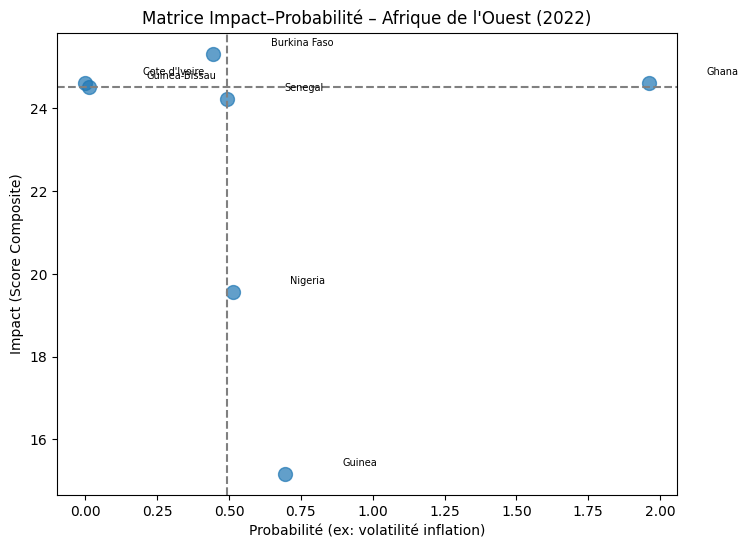

✅ Figure sauvegardée : 05-Results/03-macro_dim/pays\risk_matrix_Afrique du Nord_2022.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/pays\risk_matrix_Asie_2022.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/pays\risk_matrix_Corne de l'Afrique_2022.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/pays\risk_matrix_Europe_2022.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/pays\risk_matrix_Moyen-Orient_2022.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/pays\risk_matrix_Afrique Australe_2024.png


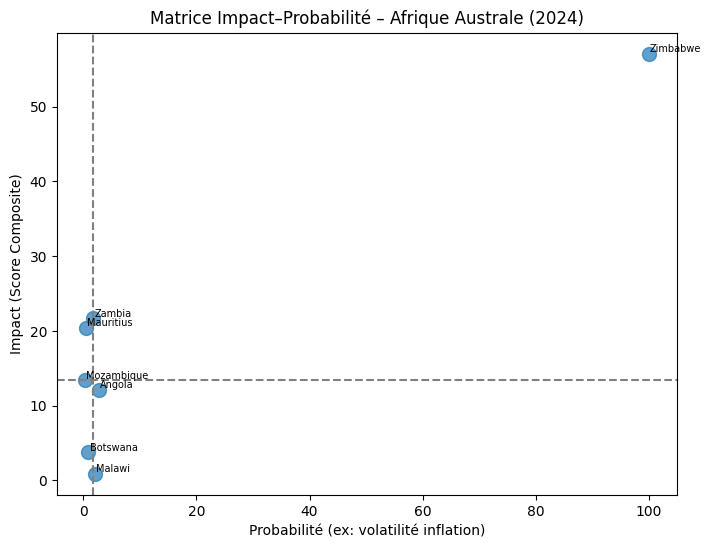

✅ Figure sauvegardée : 05-Results/03-macro_dim/pays\risk_matrix_Afrique Centrale_2024.png


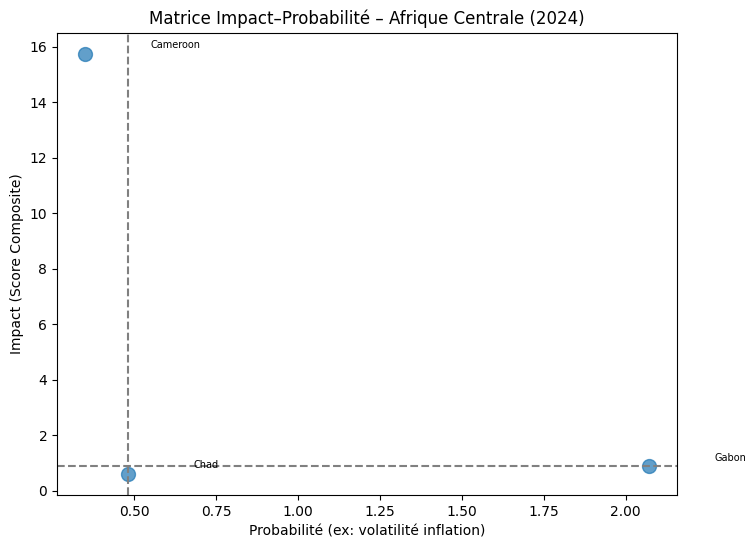

✅ Figure sauvegardée : 05-Results/03-macro_dim/pays\risk_matrix_Afrique de l'Ouest_2024.png


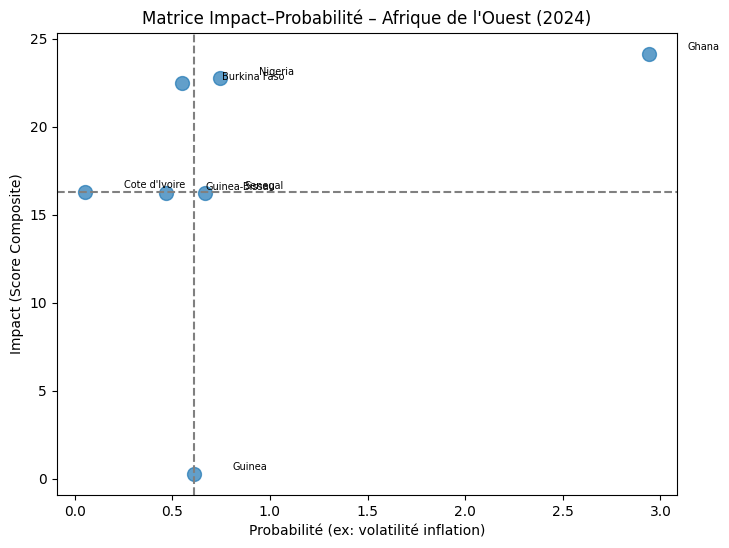

✅ Figure sauvegardée : 05-Results/03-macro_dim/pays\risk_matrix_Afrique du Nord_2024.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/pays\risk_matrix_Asie_2024.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/pays\risk_matrix_Corne de l'Afrique_2024.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/pays\risk_matrix_Europe_2024.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/pays\risk_matrix_Moyen-Orient_2024.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/pays_classes\risk_matrix_class_Afrique Australe_2020.png


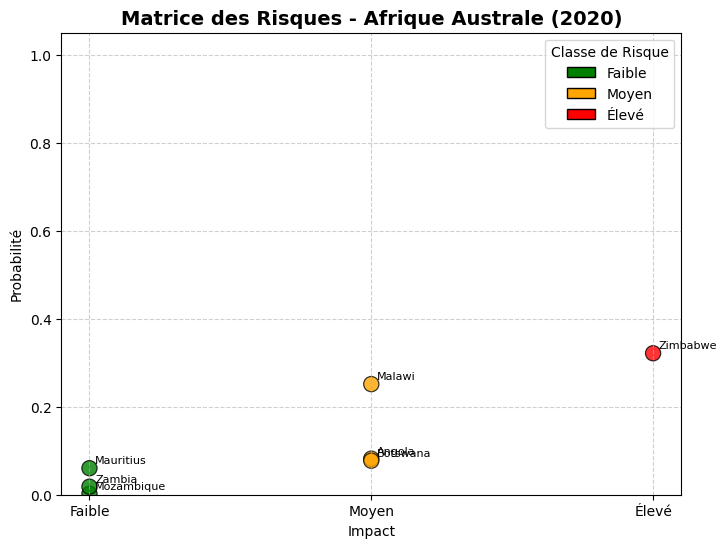

✅ Figure sauvegardée : 05-Results/03-macro_dim/pays_classes\risk_matrix_class_Afrique Centrale_2020.png


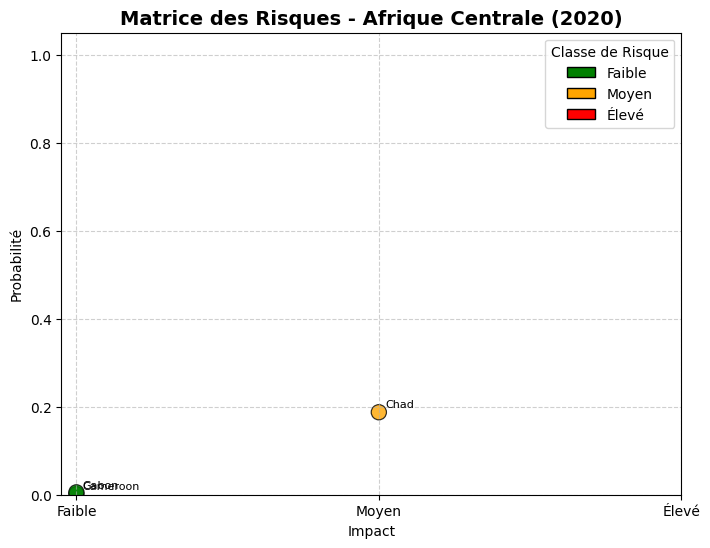

✅ Figure sauvegardée : 05-Results/03-macro_dim/pays_classes\risk_matrix_class_Afrique de l'Ouest_2020.png


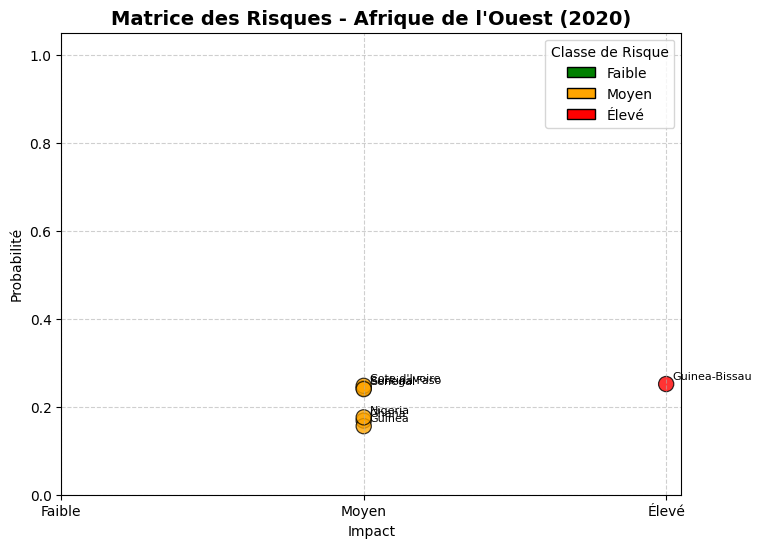

✅ Figure sauvegardée : 05-Results/03-macro_dim/pays_classes\risk_matrix_class_Afrique du Nord_2020.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/pays_classes\risk_matrix_class_Asie_2020.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/pays_classes\risk_matrix_class_Corne de l'Afrique_2020.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/pays_classes\risk_matrix_class_Europe_2020.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/pays_classes\risk_matrix_class_Moyen-Orient_2020.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/pays_classes\risk_matrix_class_Afrique Australe_2022.png


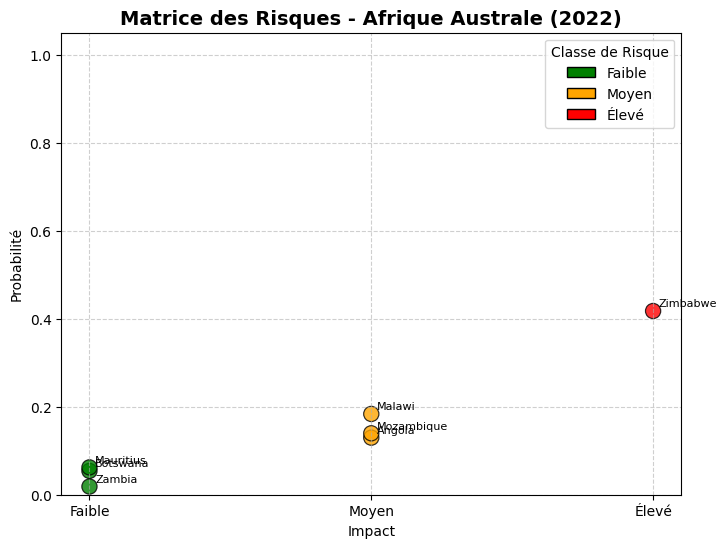

✅ Figure sauvegardée : 05-Results/03-macro_dim/pays_classes\risk_matrix_class_Afrique Centrale_2022.png


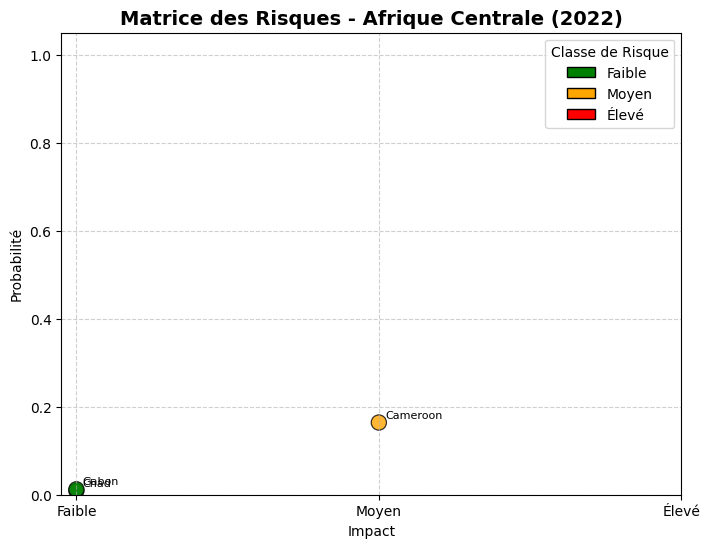

✅ Figure sauvegardée : 05-Results/03-macro_dim/pays_classes\risk_matrix_class_Afrique de l'Ouest_2022.png


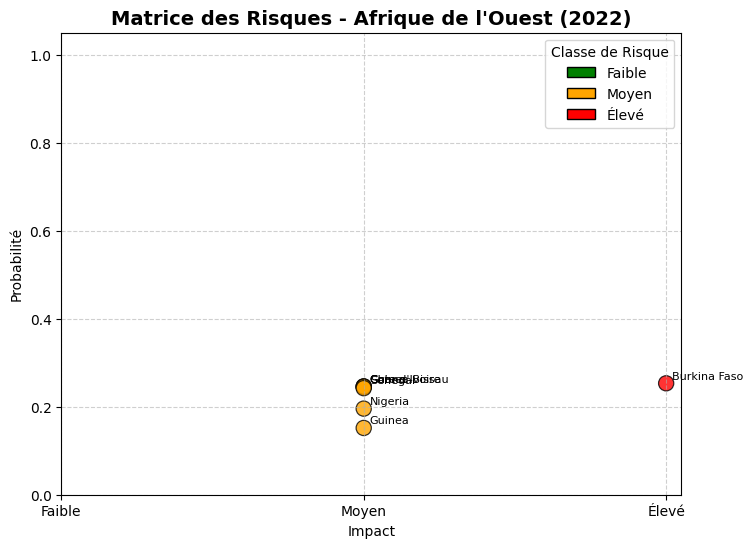

✅ Figure sauvegardée : 05-Results/03-macro_dim/pays_classes\risk_matrix_class_Afrique du Nord_2022.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/pays_classes\risk_matrix_class_Asie_2022.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/pays_classes\risk_matrix_class_Corne de l'Afrique_2022.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/pays_classes\risk_matrix_class_Europe_2022.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/pays_classes\risk_matrix_class_Moyen-Orient_2022.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/pays_classes\risk_matrix_class_Afrique Australe_2024.png


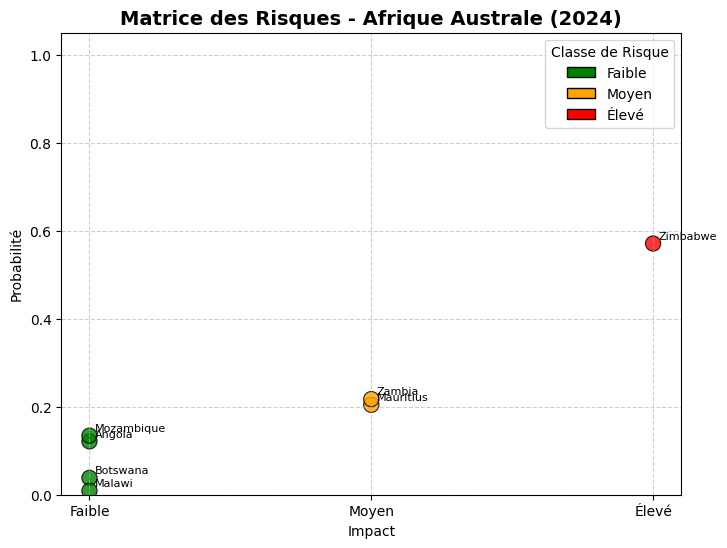

✅ Figure sauvegardée : 05-Results/03-macro_dim/pays_classes\risk_matrix_class_Afrique Centrale_2024.png


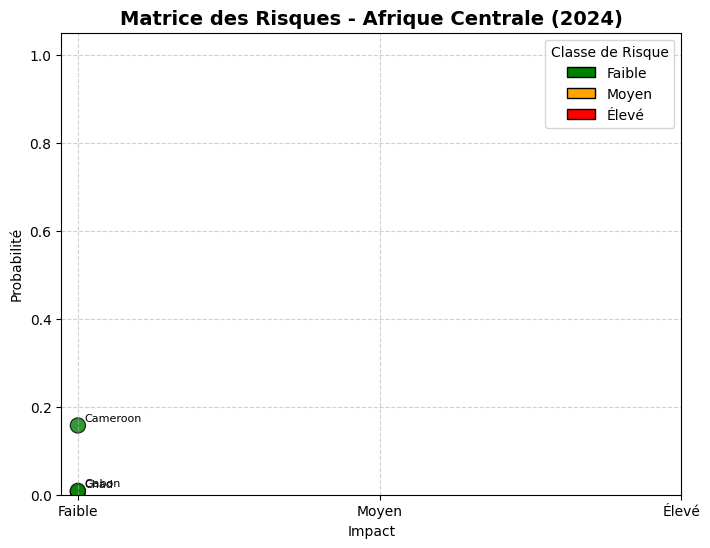

✅ Figure sauvegardée : 05-Results/03-macro_dim/pays_classes\risk_matrix_class_Afrique de l'Ouest_2024.png


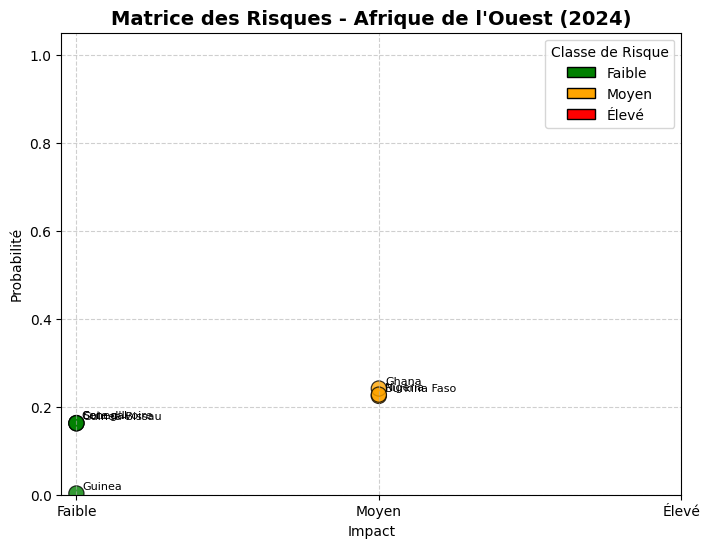

✅ Figure sauvegardée : 05-Results/03-macro_dim/pays_classes\risk_matrix_class_Afrique du Nord_2024.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/pays_classes\risk_matrix_class_Asie_2024.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/pays_classes\risk_matrix_class_Corne de l'Afrique_2024.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/pays_classes\risk_matrix_class_Europe_2024.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/pays_classes\risk_matrix_class_Moyen-Orient_2024.png
✅ Figure sauvegardée : 05-Results/03-macro_dim/groupes\group_risk_matrix_2020.png


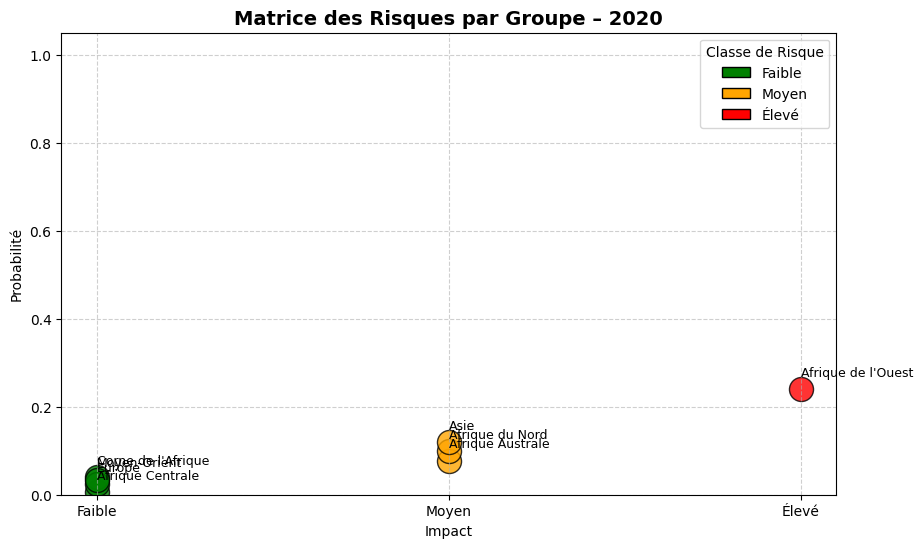

✅ Figure sauvegardée : 05-Results/03-macro_dim/groupes\group_risk_matrix_2022.png


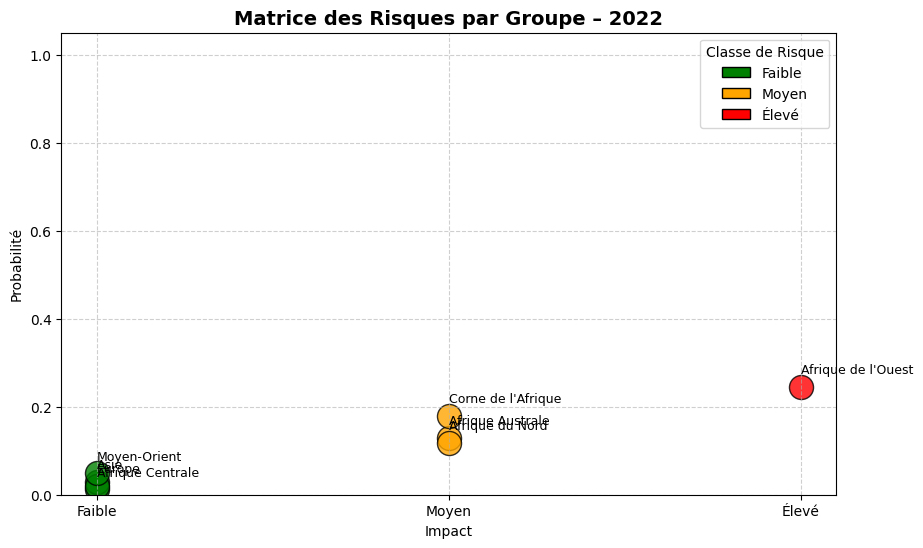

✅ Figure sauvegardée : 05-Results/03-macro_dim/groupes\group_risk_matrix_2024.png


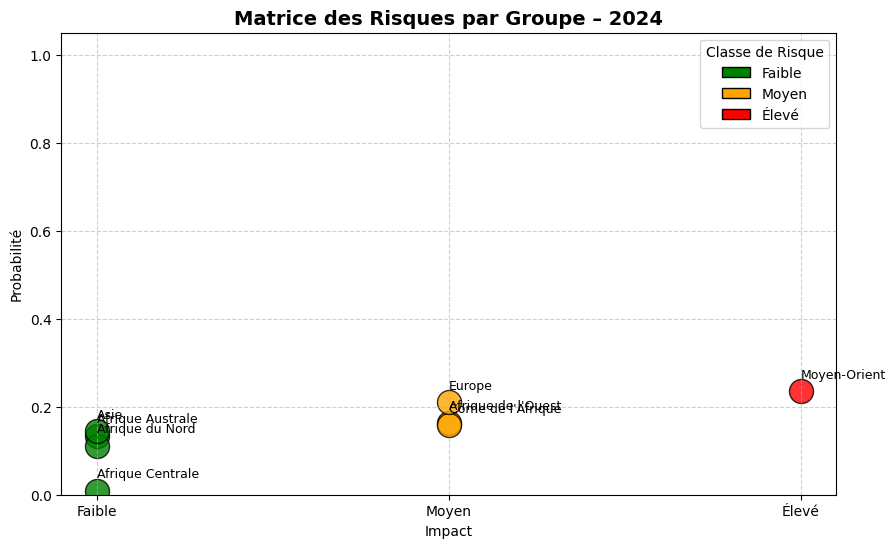

In [ ]:
years = [2020, 2022, 2024]
plot_risk_matrices_year(df_pays_year, groupes, years,  "03- Output/pays")
plot_risk_matrices_classes_year(df_pays_year, groupes, years, "03- Output/pays_classes")
plot_group_risk_matrix_year(df_groupes_year, years, "03- Output/groupes")


### Dynamics Matrices Risk per Year

✅ Animation sauvegardée pour le groupe 'Afrique Australe': 05-Results/03-macro_dim/animations\Afrique_Australe_risk_evolution.gif


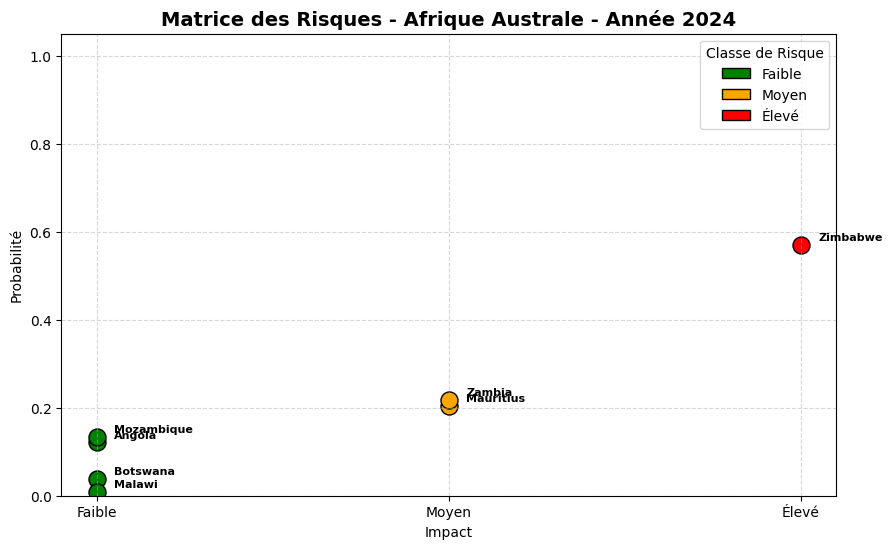

✅ Animation sauvegardée pour le groupe 'Afrique Centrale': 05-Results/03-macro_dim/animations\Afrique_Centrale_risk_evolution.gif
✅ Animation sauvegardée pour le groupe 'Afrique de l'Ouest': 05-Results/03-macro_dim/animations\Afrique_de_l'Ouest_risk_evolution.gif
✅ Animation sauvegardée pour le groupe 'Afrique du Nord': 05-Results/03-macro_dim/animations\Afrique_du_Nord_risk_evolution.gif
✅ Animation sauvegardée pour le groupe 'Asie': 05-Results/03-macro_dim/animations\Asie_risk_evolution.gif
✅ Animation sauvegardée pour le groupe 'Corne de l'Afrique': 05-Results/03-macro_dim/animations\Corne_de_l'Afrique_risk_evolution.gif
✅ Animation sauvegardée pour le groupe 'Europe': 05-Results/03-macro_dim/animations\Europe_risk_evolution.gif
✅ Animation sauvegardée pour le groupe 'Moyen-Orient': 05-Results/03-macro_dim/animations\Moyen-Orient_risk_evolution.gif


In [ ]:
animate_risk_matrices_by_group(
    df_pays_year,
    save_folder="03- Output/animations",
    interval=1200,
    years_to_plot=[2010, 2015, 2020, 2024],
    max_show=1
)


In [ ]:
animate_group_risk_matrix(
    df_groupes_year,
    save_path="03- Output/groupes_evolution.gif",
    interval=1200,
    years_to_plot=[2010, 2015, 2020, 2024]  # seulement ces années
)

✅ Animation sauvegardée : 05-Results/03-macro_dim/groupes_evolution.gif
